# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("/content/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
def test_fit(n_numb=5, epoh_numb=3000):
    ### Шаг 3. Обученние нейронной сети

    # определим число нейронов скрытого слоя
    neuron_numb = n_numb

    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.005

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epoh_numb):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    
    # тест
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100

    return round(accuracy,2), round(accuracy_t,2)


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
# plt.figure(figsize = (16,5))
# plt.plot(errors)
# plt.xlabel('Обучение')
# plt.ylabel('Ошибка')
# plt.show() # расскоментируйте, чтобы посмотреть 

# N = 50
# plt.figure(figsize = (16,5))
# plt.plot(layer2[:N,1], 'r',label = 'Y new')
# plt.plot(y_train[:N,1],'g', label = 'Y train')
# plt.xlabel('№ примера')
# plt.ylabel('выход сети и целевой')
# plt.legend( )
# plt.show() # расскоментируйте, чтобы посмотреть 
        
# print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [5]:
# print('Нейронов: 3.  Эпох: 3000.  Accuracy train:', test_fit(n_numb=3, epoh_numb=3000)[0], 'Accuracy test:', test_fit(n_numb=3, epoh_numb=3000)[1])
# print('Нейронов: 5.  Эпох: 3000.  Accuracy train:', test_fit(n_numb=5, epoh_numb=3000)[0], 'Accuracy test:', test_fit(n_numb=5, epoh_numb=3000)[1])

# print('Нейронов: 10. Эпох: 3000.  Accuracy train:', test_fit(n_numb=10, epoh_numb=3000)[0], 'Accuracy test:', test_fit(n_numb=10, epoh_numb=3000)[1])
# print('Нейронов: 20. Эпох: 3000.  Accuracy train:', test_fit(n_numb=20, epoh_numb=3000)[0], 'Accuracy test:', test_fit(n_numb=20, epoh_numb=3000)[1])
# print('Нейронов: 30. Эпох: 3000.  Accuracy train:', test_fit(n_numb=30, epoh_numb=3000)[0], 'Accuracy test:', test_fit(n_numb=30, epoh_numb=3000)[1])

# print('Нейронов: 5.  Эпох: 10000. Accuracy train:', test_fit(n_numb=5, epoh_numb=10000)[0], 'Accuracy test:', test_fit(n_numb=5, epoh_numb=10000)[1])
# print('Нейронов: 5.  Эпох: 20000. Accuracy train:', test_fit(n_numb=5, epoh_numb=20000)[0], 'Accuracy test:', test_fit(n_numb=5, epoh_numb=20000)[1])
# print('Нейронов: 5.  Эпох: 30000. Accuracy train:', test_fit(n_numb=5, epoh_numb=30000)[0], 'Accuracy test:', test_fit(n_numb=5, epoh_numb=30000)[1])

# print('Нейронов: 30. Эпох: 30000. Accuracy train:', test_fit(n_numb=30, epoh_numb=30000)[0], 'Accuracy test:', test_fit(n_numb=30, epoh_numb=30000)[1])

Нейронов: 3.  Эпох: 3000.  Accuracy train: 77.89 Accuracy test: 73.93
Нейронов: 5.  Эпох: 3000.  Accuracy train: 78.18 Accuracy test: 74.07
Нейронов: 10. Эпох: 3000.  Accuracy train: 79.37 Accuracy test: 75.74
Нейронов: 20. Эпох: 3000.  Accuracy train: 80.31 Accuracy test: 76.58
Нейронов: 30. Эпох: 3000.  Accuracy train: 80.46 Accuracy test: 77.34
Нейронов: 5.  Эпох: 10000. Accuracy train: 88.67 Accuracy test: 90.76
Нейронов: 5.  Эпох: 20000. Accuracy train: 94.71 Accuracy test: 94.38
Нейронов: 5.  Эпох: 30000. Accuracy train: 95.79 Accuracy test: 94.85
Нейронов: 30. Эпох: 30000. Accuracy train: 95.77 Accuracy test: 95.25


In [20]:
_nn = [1, 3, 5, 10, 20, 30]
_en = [500, 3000, 10000, 20000, 30000]

test_df = pd.DataFrame(columns=['n_numb', 'epoh_numb', 'Accuracy_train', 'Accuracy_test'])
for en in _en:
  for nn in _nn:
    a_tain, a_teat = test_fit(n_numb=nn, epoh_numb=en)
    test_df = test_df.append({'n_numb': nn, 'epoh_numb': en, 'Accuracy_train': a_tain, 'Accuracy_test': a_teat}, ignore_index=True)

In [21]:
test_df['n_plus_epoh'] = test_df['n_numb'].astype('int').astype('str') + '_' + test_df['epoh_numb'].astype('int').astype('str')
test_df

,n_numb,epoh_numb,Accuracy_train,Accuracy_test,n_plus_epoh
0,1.0,500.0,56.35,53.93,1_500
1,3.0,500.0,56.37,54.99,3_500
2,5.0,500.0,57.90,56.23,5_500
3,10.0,500.0,67.44,63.86,10_500
4,20.0,500.0,68.86,65.08,20_500
5,30.0,500.0,71.12,67.10,30_500
6,1.0,3000.0,61.30,55.65,1_3000
7,3.0,3000.0,77.69,73.38,3_3000
8,5.0,3000.0,78.19,74.06,5_3000
9,10.0,3000.0,79.16,75.45,10_3000


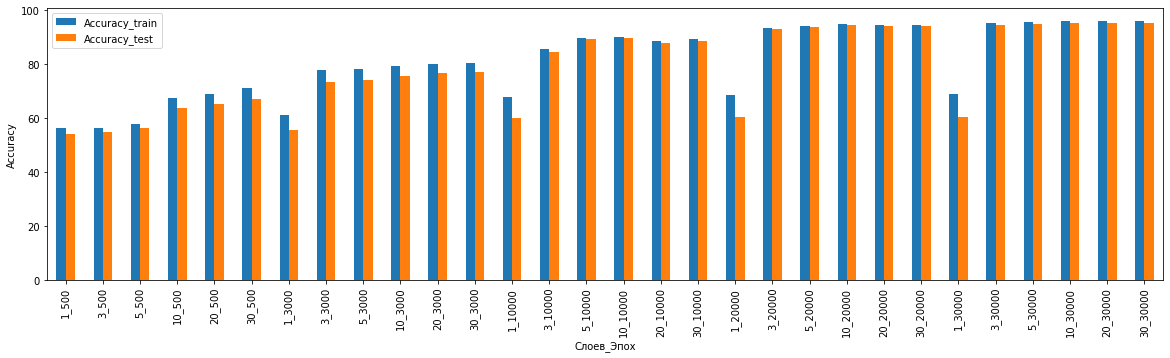

In [26]:
test_df[['n_plus_epoh', 'Accuracy_train', 'Accuracy_test']]\
.plot(x='n_plus_epoh', xlabel='Слоев_Эпох', ylabel='Accuracy', kind='bar', figsize=(20, 5))

#### Наблюдаем, что число нейронов на скрытом слое влияет на точность, но не так сильно, по сравнению с увеличением количества эпох. Даже при неизменном малом количестве нейронов, с увеличением количества эпох точность нейросети существенно улучшается (если не брать предельно малое число неронов равное 1)

### Выводы: 
####1) При увеличении числа нейровнов, точность увеличивается и наоборот.
####2) При увеличении количества эпох обучения, точность увеличивается существенно!
####3) Чем меньше эпох обучения, тем больше влияния на точность модели оказывает количество нейронов в слое (больше нейронов - лучше качество). И чем больше эпох обучения, тем менее значимо для модели увеличение количества нейронов в слое.
####4) В данной модели для лучшей точности достаточно от 3 до 10 нейронов в сочетании с большим количеством эпох >20000.